<a href="https://colab.research.google.com/github/yousufislam191/Machine-Learning-Practice/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression Project
## Modelling the linear relationship between Sales and Advertising dataset

## Project overview


In this project, I build a Simple Linear Regression model to study the linear relationship between Sales and Advertising dataset for a dietary weight control product.

## The problem statement

* The aim of building a machine learning model is to solve a problem and to define a metric to measure model performance.

* The problem is to model and investigate the linear relationship between Sales and Advertising dataset for a dietary weight control product.

* I have used two performance metrics RMSE (Root Mean Square Value) and R2 Score value to compute our model performance.






In [79]:
# import all library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
# Read the data into a DataFrame

df = pd.read_csv('http://www.econometrics.com/intro/SALES.txt', delim_whitespace=True, header=None)

In [81]:
df.shape

(36, 2)

In [82]:
df.head()

,0,1
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


### pandas columns attribute

Renamed the column labels of the dataframe with the columns attribute

In [83]:
# Rename columns of df dataframe

df.columns = ['Sales', 'Advertising']

In [84]:
df.head()

,Sales,Advertising
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


Viewed the summary of the dataframe with the pandas info() method.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


There is no null value and all feature are numeric value

Look at the descriptive statistics of the dataframe with the pandas describe() method.

In [86]:
df.describe()

,Sales,Advertising
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


In [87]:
# Declare feature variable and target variable

x = df['Sales'].values
y = df['Advertising'].values

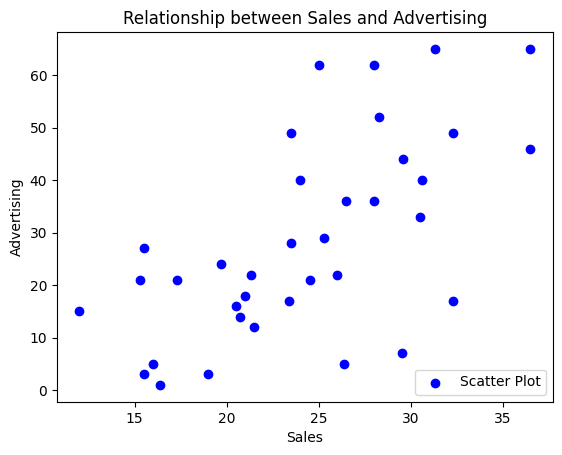

In [88]:
plt.scatter(x, y, color='blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

## Checking dimensions of X and y

We need to check the dimensions of X and y to make sure they are in right format for Scikit-Learn API.

In [89]:
print(x.shape)
print(y.shape)

(36,)
(36,)


## Reshaping X and y

Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

It specifies first dimension to be -1, which means "unspecified".

Its value is inferred from the length of the array and the remaining dimensions.


In [90]:
x_reshape = x.reshape(-1, 1)
y_reshape = y.reshape(-1, 1)

In [91]:
print(x_reshape.shape)
print(y_reshape.shape)

(36, 1)
(36, 1)


## Train Test split

In [92]:
# split x and y into training and test data sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_reshape, y_reshape, test_size = 0.33, random_state=2)

In [93]:
# Print the dimensions of X_train,X_test,y_train,y_test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


Fit the model using Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [95]:
# Train the model using training data sets

LR.fit(x_train, y_train)

LinearRegression()

In [96]:
# Predict on the test data
y_predict = LR.predict(x_test)

## Model slope and intercept term

In [97]:
# Compute model slope and intercept

m = LR.coef_
c = LR.intercept_,
print("Estimated model slope, m:" , m)
print("Estimated model intercept, c:" , c)

Estimated model slope, m: [[1.91263438]]
Estimated model intercept, c: (array([-19.52778265]),)


In [98]:
# So, our fitted regression line is

# y = 1.91263438 * x - 19.52778265

# That is our linear model.

## Making predictions


I have predicted the Advertising values on first five 5 Sales datasets by writing code

In [99]:
# Predicting Advertising values on first five Sales values.

LR.predict(x_reshape)[0:5]

array([[ 3.42382989],
       [19.68122211],
       [20.6375393 ],
       [10.11805022],
       [ 9.73552334]])

## Checking model performance
Here I will use RMSE (Root Mean Square Error) and R-Squared Value.

In [100]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 12.1951


In [102]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_predict)))

R2 Score value: 0.5033


## Interpretation and Conclusion


* 8The RMSE value has been found to be 12.1951. It means the standard deviation for our prediction is 12.1951. So, sometimes we expect the predictions to be off by more than 12.1951 and other times we expect less than 12.1951. So, the model is not good fit to the data.


* In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be 0.5033. It means that this model explains 50.33 % of the variance in our dependent variable. So, the R2 score value confirms that the model is not good enough to deploy because it does not provide good fit to the data.

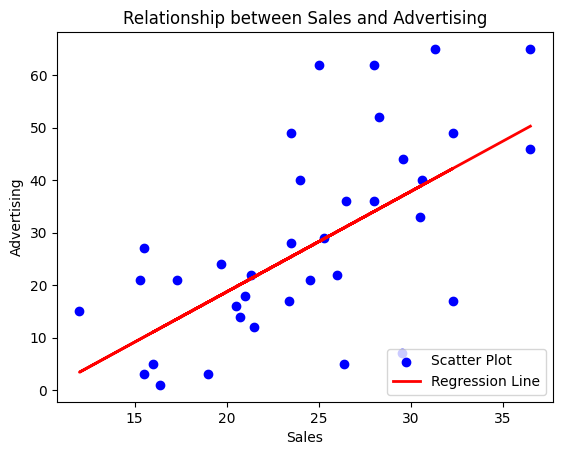

In [103]:
# Plot the Regression Line

plt.scatter(x, y, color = 'blue', label='Scatter Plot')
plt.plot(x_test, y_predict, color = 'red', linewidth=2, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

## Residual analysis

A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

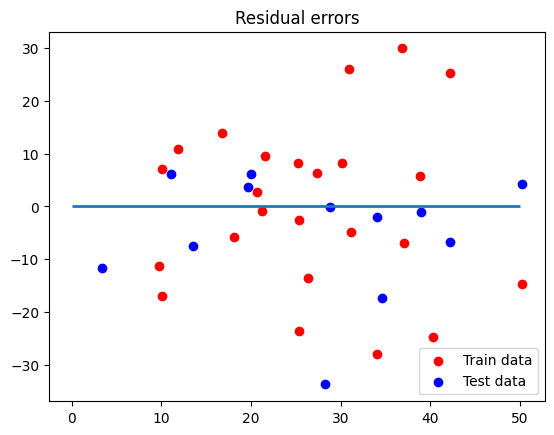

In [105]:
# Plotting residual errors

plt.scatter(LR.predict(x_train), LR.predict(x_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(LR.predict(x_test), LR.predict(x_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 2)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

## Checking for Overfitting and Underfitting

In [106]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(LR.score(x_train,y_train)))

print("Test set score: {:.4f}".format(LR.score(x_test,y_test)))

Training set score: 0.3256
Test set score: 0.5033


**I calculate training set score as 0.2861. Similarly, I calculate test set score as 0.3256.**

* The training set score is very poor. So, the model does not learn the relationships appropriately from the training data. Thus, the model performs poorly on the training data. It is a clear sign of Underfitting. Hence, I validated my finding that the linear regression model does not provide good fit to the data.


* Underfitting means our model performs poorly on the training data. It means the model does not capture the relationships between the training data. This problem can be improved by increasing model complexity. We should use more powerful models like Polynomial regression to increase model complexity.